In [29]:
import glob
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import threshold_otsu
from scipy.stats import linregress

### Load the data

In [3]:
folder = 'Data/entropy_application/*.*'
file_list = sorted(glob.glob(folder))

In [4]:
image_list = []
for file in file_list:
    image_list.append(plt.imread(file))

### Entropy filtered based image segmentation for textured features
Here, we have a series of images below showing how the center smooth area evolves over time. A problem of interest is to measure how the smooth area shrinks across the series. To obtain the information, we can track the area by segmenting the images to rough and smooth areas. While we can clearly discern the texture differences from the images, basic histogram based image segmentation does not work well here as there is no clear intensity separation between the textured and smooth area. Instead of intensity, we will utilize the texture to help the segmentation task.

We will first use the entropy filter to bring out the texture information from the images. Next we will apply basic thresholding technique to the filtered images and achieve our image segmentation goal. Finally, from the segmented images, we will extract the information about the shrinkage of the smooth area.

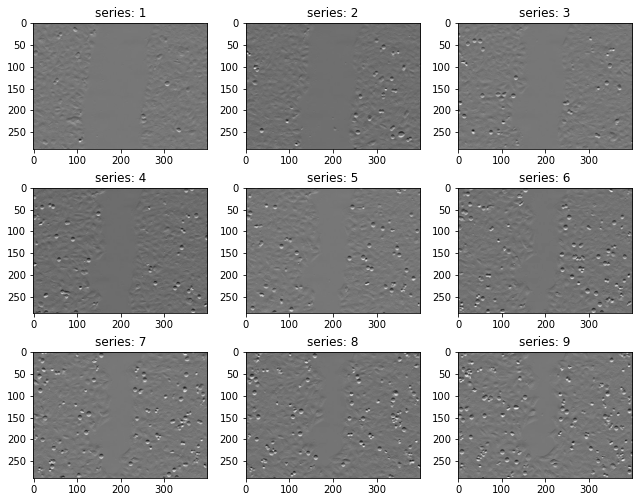

In [25]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 7))
sequence = 1
for ax, img in zip(axs.ravel(), image_list):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'series: {sequence}')
    sequence += 1
plt.tight_layout()

#### Identify smooth area with the entropy filter and segmentation
Entropy filter (`skimage.filters.rankskimage.filters.rank.entropy()`) can pick up texture information (randomness in pixel intensities). The input parameter `disk` defines the area where the entropy is to be calculated. The smaller the disk value the more local randomness is to be sampled. Here we choose disk size of 9 to balance the texture identification and noise generation.

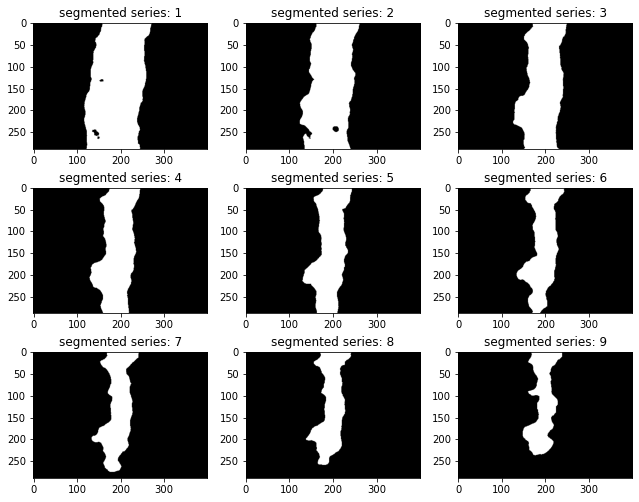

In [20]:
smooth_area = np.array([])
sequence = 1
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 7))
for ax, img in zip(axs.ravel(), image_list):
    entropy_img = entropy(img, disk(9))
    thresh = threshold_otsu(entropy_img)
    binary = (entropy_img <= thresh)
    smooth_area = np.append(smooth_area, np.sum(binary == True))
    ax.imshow(binary, cmap='gray')
    ax.set_title(f'segmented series: {sequence}')
    sequence += 1
plt.tight_layout()

#### Extract numerical information of the evolution of the smooth area
We can see from the plot below that the smooth area shrinks as the series evolves. In the final image, the smooth area is reduced to about 30% of its initial size.

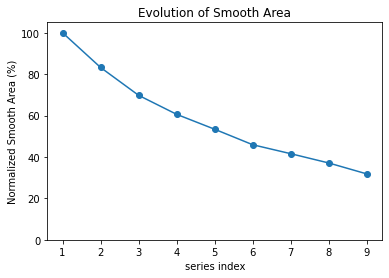

In [28]:
series = np.arange(1,10)
plt.plot(series, smooth_area/smooth_area[0]*100, marker='o')
plt.ylim(0, 105)
plt.xlabel('series index')
plt.ylabel('Normalized Smooth Area (%)')
plt.title('Evolution of Smooth Area');

#### Estimate the area shrinkage behavior by simple linear regression
- The p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic.The p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic.
- Standard error (std_err) of the estimated slope (gradient), under the assumption of residual normality.Standard error of the estimated slope (gradient), under the assumption of residual normality.

In [30]:
area = smooth_area/smooth_area[0]*100
slope, intercept, r_value, p_value, std_err = linregress(series, area)

In [40]:
print(f'modeled behavior: area = {intercept} {slope}*time')
print(f'p value = {p_value}')
print(f'R2 value = {r_value**2}')

modeled behavior: area = 98.33041681974335 -8.03773420732061*time
p value = 1.239864107759365e-05
R2 value = 0.9439598547400719


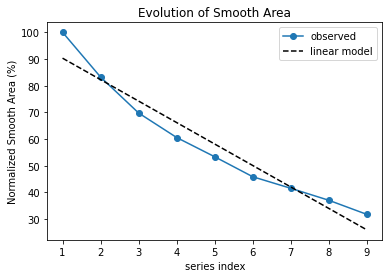

In [37]:
x= np.linspace(1, 9, 20)
plt.plot(series, smooth_area/smooth_area[0]*100, marker='o', label='observed')
plt.plot(x, intercept+slope*x, color='black', linestyle='dashed', label='linear model')
plt.legend()
plt.xlabel('series index')
plt.ylabel('Normalized Smooth Area (%)')
plt.title('Evolution of Smooth Area');

#### Additional code notes

In [25]:
for file in sorted(glob.glob(folder)):
    print(file)

Data/entropy_application/Scratch0.jpeg
Data/entropy_application/Scratch1.jpeg
Data/entropy_application/Scratch2.jpeg
Data/entropy_application/Scratch3.jpeg
Data/entropy_application/Scratch4.jpeg
Data/entropy_application/Scratch5.jpeg
Data/entropy_application/Scratch6.jpeg
Data/entropy_application/Scratch7.jpeg
Data/entropy_application/Scratch8.jpeg
Data/entropy_application/Scratch9.jpeg


In [ ]:
# observe how the disk size affect the filter behavior and pick a desired value
radii = np.arange(2,11)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 7))
for ax, radius in zip(axs.ravel(), radii):
    ax.imshow(entropy(image_list[0], disk(radius)), cmap='gray')
    ax.set_title(f'disk radius: {radius}')
plt.tight_layout()

In [46]:
from skimage.filters import roberts, sobel, scharr, prewitt
from scipy import ndimage as nd

In [42]:
test = image_list[0].copy()

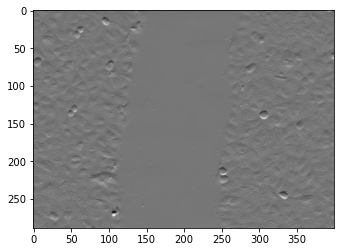

In [44]:
plt.imshow(test, cmap='gray')

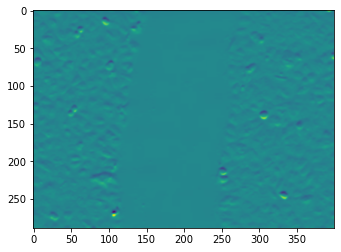

In [49]:
plt.imshow(nd.gaussian_filter(test, sigma=1))

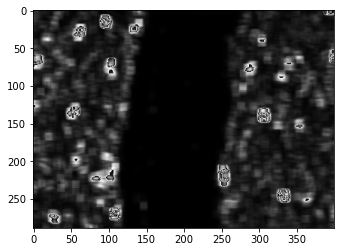

In [56]:
plt.imshow(nd.generic_filter(test, np.var, size=10), cmap='gray')